In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(111)

In [3]:
X = np.random.rand(5, 10000)
y = np.random.randint(2, size=10000).reshape(1, 10000)

In [4]:
print(f'Shape of X = {X.shape}')
print(f'Shape of y = {y.shape}')

Shape of X = (5, 10000)
Shape of y = (1, 10000)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def relu(z):
    return z * (z > 0)

In [7]:
def relu_derivative(z):
    return 1 * (z > 0)

In [8]:
hidden_neurons = 6
epochs = 10000
m = X.shape[1]
learning_rate = 0.01
cost = [0]*epochs

In [9]:
W1 = np.random.randn(hidden_neurons, X.shape[0])*0.01
b1 = np.zeros((hidden_neurons, 1)) 
W2 = np.random.randn(y.shape[0], hidden_neurons)*0.01
b2 = np.zeros((y.shape[0], 1))

In [10]:
for epoch in range(epochs):
    
    # forward prop
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    y_pred = sigmoid(Z2)
    
    # cost 
    cost[epoch] = -(1/m)*np.sum((y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
    if epoch%100 == 0:
        print(f'Cost after {epoch} iterations = {cost[epoch]}')
    
    # backward prop
    dZ2 = y_pred - y
    dW2 = (1/m)*(np.dot(dZ2, A1.T)) 
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
    dW1 = (1/m)*(np.dot(dZ1, X.T)) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    # updating the parameters
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2
    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1

Cost after 0 iterations = 0.6931477112380235
Cost after 100 iterations = 0.6931453468201875
Cost after 200 iterations = 0.6931439109819607
Cost after 300 iterations = 0.6931430377175885
Cost after 400 iterations = 0.6931425053189006
Cost after 500 iterations = 0.6931421794548983
Cost after 600 iterations = 0.6931419786999202
Cost after 700 iterations = 0.6931418537790383
Cost after 800 iterations = 0.6931417748308486
Cost after 900 iterations = 0.6931417237499202
Cost after 1000 iterations = 0.6931416895542524
Cost after 1100 iterations = 0.6931416656467742
Cost after 1200 iterations = 0.6931416479376286
Cost after 1300 iterations = 0.6931416340334244
Cost after 1400 iterations = 0.6931416224978458
Cost after 1500 iterations = 0.6931416123822548
Cost after 1600 iterations = 0.693141603201962
Cost after 1700 iterations = 0.6931415946076182
Cost after 1800 iterations = 0.6931415863924023
Cost after 1900 iterations = 0.6931415784611856
Cost after 2000 iterations = 0.6931415707212969
Cost 

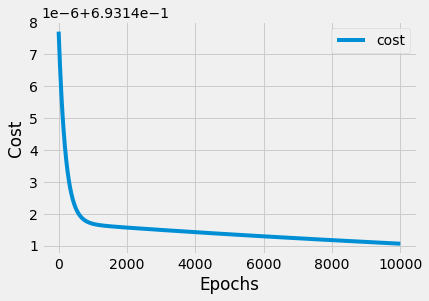

In [11]:
plt.style.use('fivethirtyeight')
        
plt.plot(cost, label = 'cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()